# Price Prediction of used Cars

### The pain in the abdomen

**Bored of your old car? Planning to get rid of it? But don't know what's the optimum market price for it? Sed lyf :(**

### Dataset

**The data has various information about a car's specifications such as the make and model of the car, odometer reading, year of manufacture etc. that'll help decide the current value of a car. There are more features about each vehicle in the dataset which might not be relevant in this particular scenario that will be dropped accordingly. But to decide the vehicle's valuation after the deprecation from they're bought the dataset provides sufficient knowledge.**

### One Problem One Solution

**Buying and selling cars happens all around the year in the United States. The real challenge is when the owner doesn't know what a car's valuation should be when he is selling or buying one. To address this problem, we intend to build a model that will take in specifications of the car and estimates its current market value. We used data that is scraped from automobile reselling website which consists of 426k records, and the dataset has 25 attributes. Nearly half the attributes might not be relevant in price prediction and that leads to feature selection. The data is analyzed and based on the results; a suitable model is applied for the prediction.**

### Intuition

**After analyzing the data we inferred that the important attributes have a large number of unique values. If the dataset has numerous unique set of values for each record, it becomes very tough for the model to train and understand the trends. Therefore a lot of data cleaning and preparation has been performed on the dataset, so it can be a better fit for the models.**

### Goal

**The goal of this project is to primarily solve the problem of predicting a used car's price. Also, this approach can be handy in predicting values where many attributes have influence over the result. If the target value is spread over a very big range of values, this model will be an approach or a motivation for future developments.**

**Note : We referred to a couple of codes on kaggle to understand on how to analyze data better and filter unwanted records and attributes.**

## Data Reading

**Reading the dataset from a csv file and storing that in a pandas dataframe. Taking look at the attributes and its datatypes.**

In [1]:
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv('Dataset/vehicles.csv')

In [37]:
data.shape

(426880, 26)

In [38]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Data Cleaning

**Since this data is scraped from a reselling website it consists of many attributes that are too unique to a car and might not add value in predicting the price of a car. Hence dropping columns that are not neccessary**

In [40]:
data.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)

**Analyzing for outliers and cleaning the data. For each column that is not dropped the number of NaN values for that column will give us an idea about the attribute's integrity.**

In [41]:
data.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

**Checking the NaN values percentage of each column to decide whether to drop those rows or fill them with a common value as the data has categorical data. Also duplicates are dropped here.**

In [42]:
rows = data.shape[0]
data.isna().sum()/rows*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
dtype: float64

**We observe that for a few columns like year, model, transmission the columns with NaN values are less in percentage hence they can be discarded as they won't contribute in reducing the dataset to way too much. But for the other columns we can't just drop as they are too large in number and can't assign a value from based on existing ones as they are categorical data. Hence we mark them "hidden" as the values are unkown.**

In [43]:
data = data.dropna(subset=['year', 'odometer', 'manufacturer', 'model','fuel','title_status','transmission'])

In [44]:
data.fillna('hidden', inplace=True)

In [45]:
data = data.drop_duplicates()

**The disribution of values in each column in spread over a huge set hence we keep only the records that are under set of most occurring values otherwise assign a common value**

In [46]:
manufacturer_uv = data['manufacturer'].value_counts()
data['manufacturer'] = data['manufacturer'].apply(lambda x: x if str(x) in manufacturer_uv[:32] else 'supplement')

In [47]:
region_values = data['region'].value_counts()
data['region'] = data['region'].apply(lambda x: x if str(x) in region_values[:65] else 'supplement')

In [48]:
model_values = data['model'].value_counts()
data['model'] = data['model'].apply(lambda x: x if str(x) in model_values[:40] else 'supplement')

**Checking the range of values for each numerical column and filtering data**

In [49]:
data.describe()

,price,year,odometer
count,3.385890e+05,338589.000000,3.385890e+05
mean,7.127926e+04,2011.480408,9.515804e+04
std,1.228086e+07,8.940411,1.861142e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.000000e+03,2008.000000,3.593100e+04
50%,1.459500e+04,2014.000000,8.359800e+04
75%,2.699000e+04,2017.000000,1.330000e+05
max,3.736929e+09,2022.000000,1.000000e+07


**In the above description we can find that the odometer and price values are spread too thin and have huge ranges based on the values in these columns we change the ranges for the attributes and use these for the final data to be trained and tested**

In [50]:
price_25perc = data['price'].quantile(0.25)
price_75perc = data['price'].quantile(0.75)
price_interquartrange = price_75perc - price_25perc
price_max = price_75perc + 1.5 * price_interquartrange
price_min = data['price'].quantile(0.175)
data = data[(data['price'] > price_min) & (data['price'] < price_max) ]
data['price'] = data['price'].astype(int)

In [51]:
odometer_25perc = data['odometer'].quantile(0.25)
odometer_75perc = data['odometer'].quantile(0.75)
odometer_interquartrange = odometer_75perc - odometer_25perc
odometer_max = odometer_75perc + 1.5 * odometer_interquartrange
odometer_min = data['odometer'].quantile(0.1)
data = data[(data['odometer'] > odometer_min) & (data['odometer'] < odometer_max)]
data['odometer'] = data['odometer'].astype(int)

In [52]:
data['year'] = data['year'].astype(int)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/7c/t5z2cmhs79z_0qxbr2j8k3ww0000gn/T/ipykernel_18398/3337742744.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




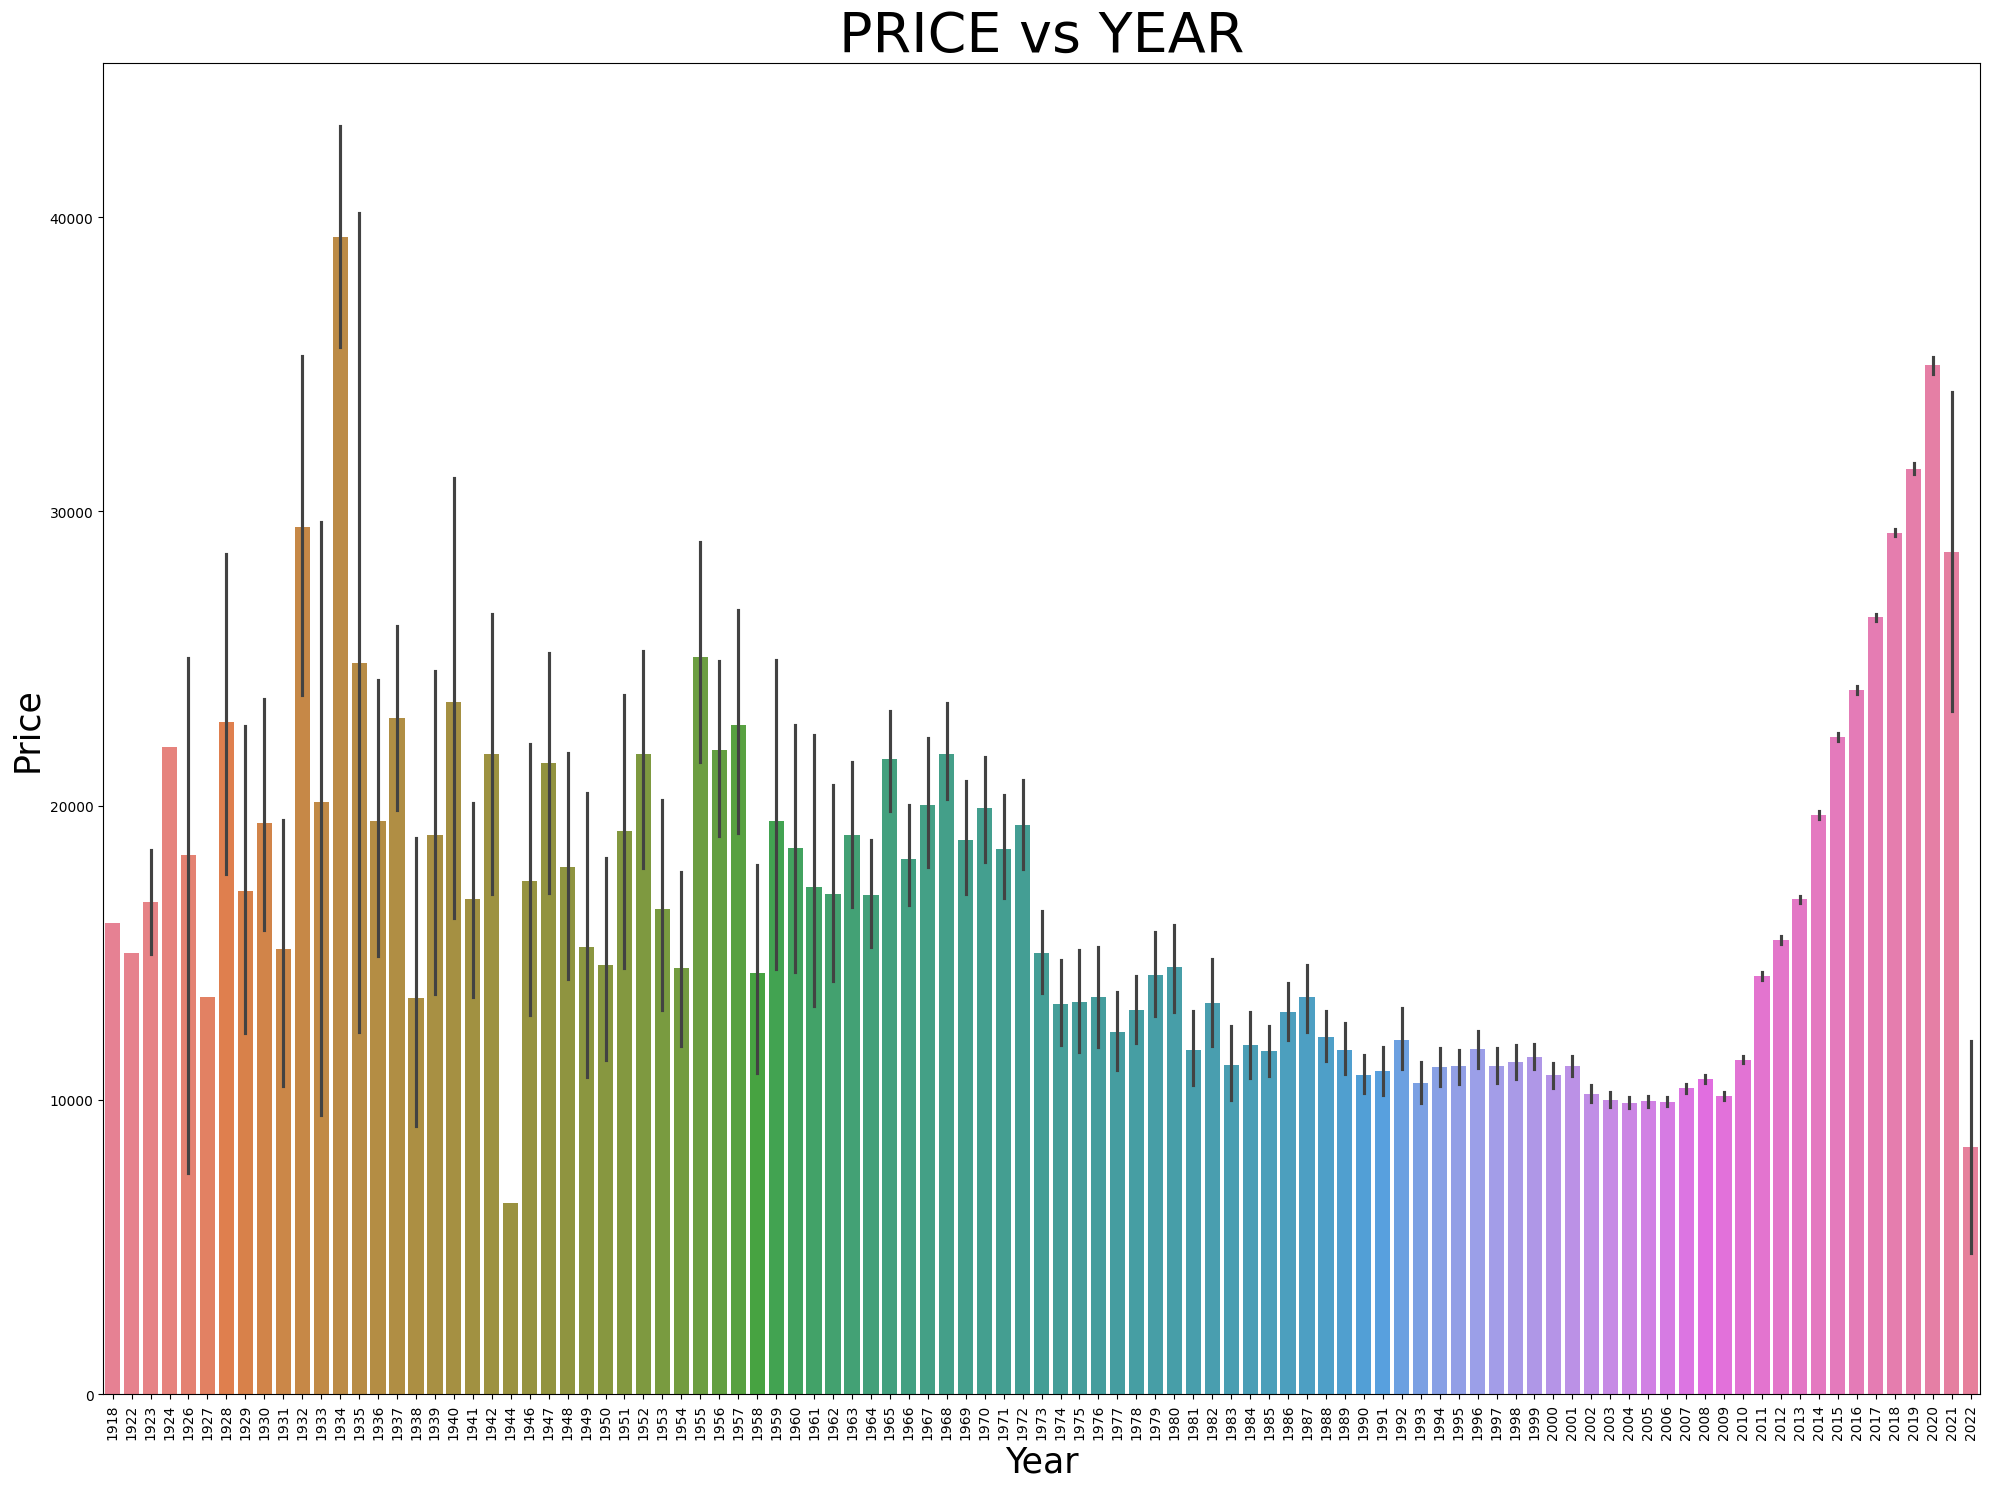

In [64]:
plt.rcParams["figure.autolayout"] = True
sns.color_palette("Paired")
plt.figure(figsize =(20,15))
bar_colors = ['blue', 'green', 'orange', 'red']
sns.barplot(y=data['price'],x=data['year'],palette = "husl",hue = None, legend=False)
plt.title("PRICE vs YEAR",fontsize=40)
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Price',fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**From the above plot we are able to clearly infer that there is no proper trend on the column across the whole range but we can observe from year 2000 there is a proper curve in the increase of price along the years, hence we can filter for data only in these years which will help train models better**

In [21]:
data = data[data['year'] >= 2000]
data['lifespan'] = 2023 - data['year']
data.drop(['year'], axis = 1, inplace = True)

## Data Visualization

In [22]:
import plotly.express as px

<Axes: >

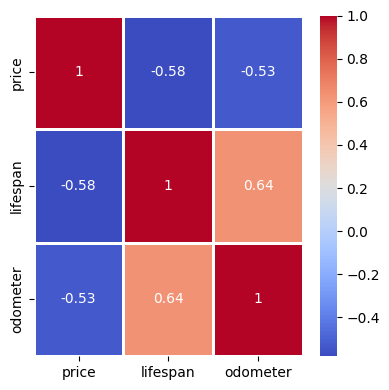

In [23]:
corr = data[['price','lifespan','odometer']].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot = True, cmap ='coolwarm', linewidths=2)

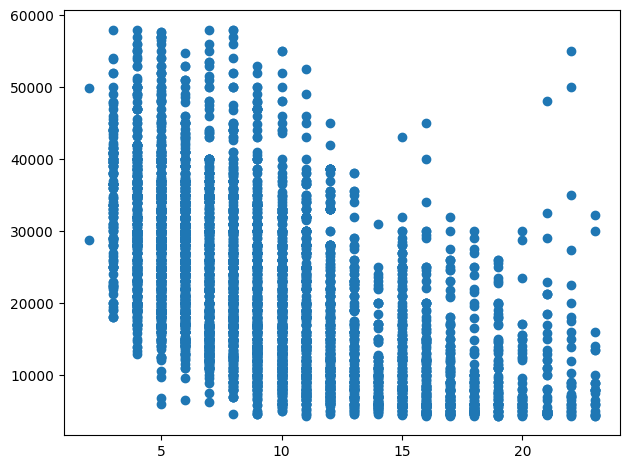

In [32]:
data_subset = data.head(5000)
plt.scatter(data_subset['lifespan'], data_subset['price'])
plt.show()

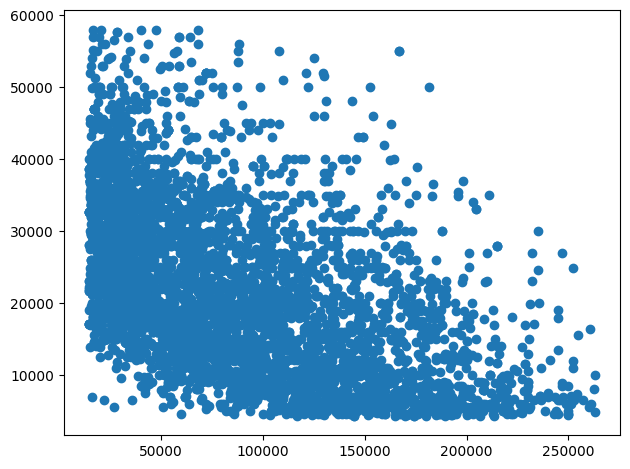

In [33]:
plt.scatter(data_subset['odometer'], data_subset['price'])
plt.show()

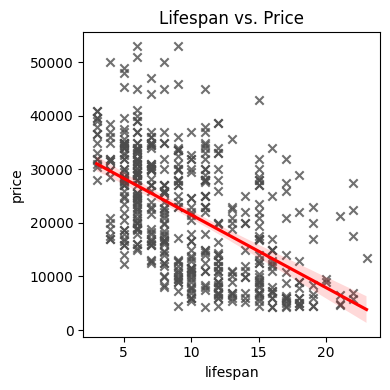

In [42]:
plt.figure(figsize=(4, 4))
sns.regplot(data=data.head(500), x='lifespan', y='price', marker="x", color=".3", line_kws=dict(color="r"))
plt.title('Lifespan vs. Price')
plt.tight_layout()
plt.show()

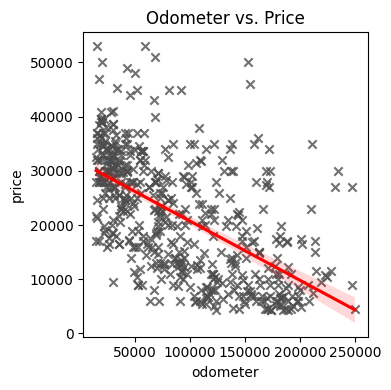

In [43]:
plt.figure(figsize=(4, 4))
sns.regplot(data=data.head(500), x='odometer', y='price', marker="x", color=".3", line_kws=dict(color="r"))
plt.title('Odometer vs. Price')
plt.tight_layout()
plt.show()

**From the numerical columns that we have and the visualization from them explains that as the odometer and lifespan of the car increases the price decreases. It is linearly proportional** 

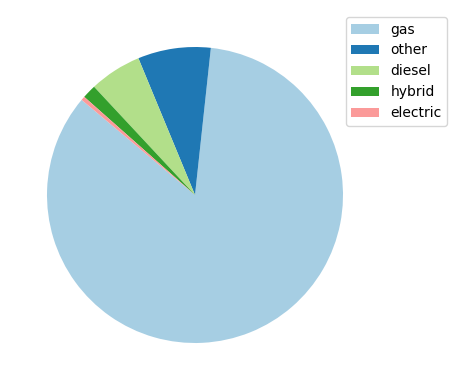

In [44]:
column_name = 'fuel'
unique_values = data[column_name].value_counts()
colors = plt.cm.Paired(range(len(unique_values)))
plt.figure(figsize=(5, 4))
plt.pie(unique_values, autopct='', startangle=140, colors=colors)
plt.legend(labels=unique_values.index, loc='upper right', bbox_to_anchor=(1.2, 1))

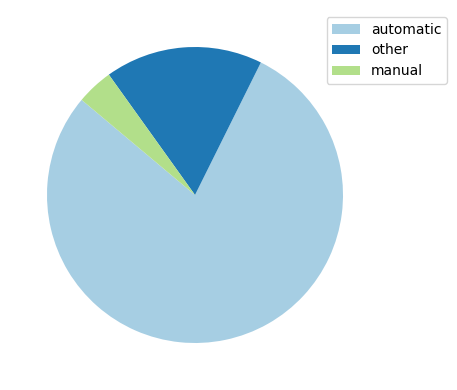

In [45]:
column_name = 'transmission'
unique_values = data[column_name].value_counts()
colors = plt.cm.Paired(range(len(unique_values)))
plt.figure(figsize=(5, 4))
plt.pie(unique_values, autopct='', startangle=140, colors=colors)
plt.legend(labels=unique_values.index, loc='upper right', bbox_to_anchor=(1.2, 1))

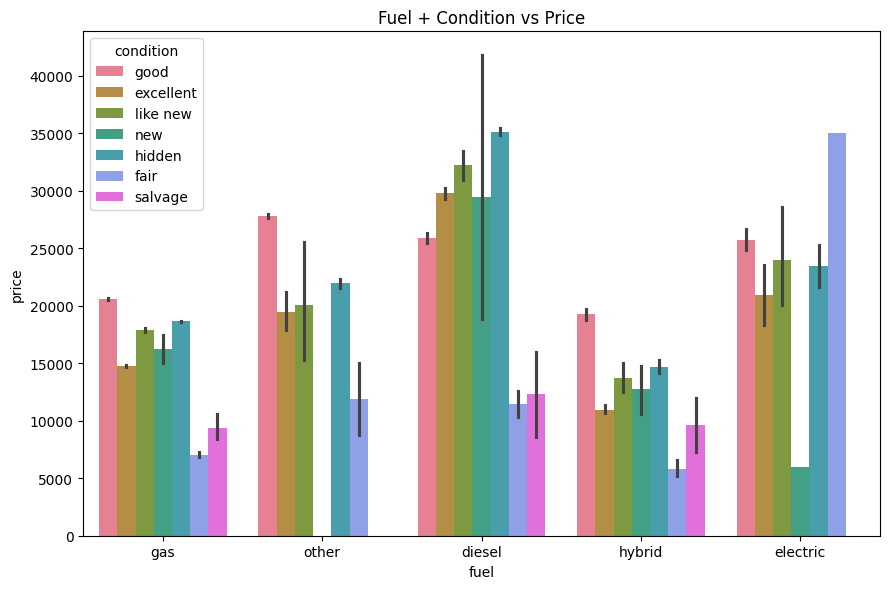

In [47]:
plt.figure(figsize=(9,6))
sns.barplot(x='fuel',y='price',hue='condition',data=data)
plt.title('Fuel + Condition vs Price')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

## Data Preprocessing

**This data consists of ostly categorical data that are not expected from the machine learning models and hence needs to converted to numerical values and for these we use Label Encoders and in that we use OneHotEncoder for those whose values do not follow any order but for the "condition" attribute the values could form an order and hence weights or numerical values are assigned based on that. We have one numerical column "odometer" whose values start from 14 thousand and goes upto 200 thousand. Models perform better when these values are scaled down and hence for that we are using standard scaler.**

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [75]:
categorical = Pipeline(
    steps = [('unordered', OneHotEncoder(sparse_output = False, drop = 'first')),
             ('ordered', 
              OrdinalEncoder(categories = 
                             [[ 'salvage',  'hidden', 'fair', 'good', 
                               'excellent', 'like new', 'new']]))]
)

In [76]:
numerical = Pipeline(
    steps = [('numerical', StandardScaler())]
)

In [77]:
encoders = ColumnTransformer(transformers = [
    ('condition', categorical['ordered'], ['condition']),
    ('categorical', categorical['unordered'], ['model', 'region', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
    ('numerical', numerical, ['odometer'])
])

**We split the data for training and testing and the ratio is 8:2 for train and test respectively.**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['price'], axis = 1), data['price'], random_state = 42, test_size = 0.2)

In [78]:
X_train_tnf = encoders.fit_transform(X_train)
X_test_tnf = encoders.fit_transform(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.metrics import median_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import VotingRegressor
import warnings
warnings.filterwarnings('ignore')

In [63]:
results = {}
evaluation_metrics = ['Accuracy','R_Squared', 'Mean_Squared_Error', 
                      'Root_Mean_Squared_Error', 'Mean_Absolute_Error', 
                      'Median_Absolute_Error', 'Explained_Variance_Score']

def evaluation(y_test, y_pred, model, results):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    results[model] = {}
    results[model]['Accuracy'] = '%.2f' % (r2 * 100)
    results[model]['Mean_Squared_Error'] = '%.4f' % mse
    results[model]['Root_Mean_Squared_Error'] = '%.4f' % rmse
    results[model]['Mean_Absolute_Error'] = '%.4f' % mae
    results[model]['R_Squared'] = '%.4f' % r2
    results[model]['Median_Absolute_Error'] = '%.4f' % median_ae
    results[model]['Explained_Variance_Score'] = '%.4f' % evs
    
    return results

In [64]:
LR = LinearRegression()
LR.fit(X_train_tnf, y_train)
y_pred_lr = LR.predict(X_test_tnf)

In [65]:
results = evaluation(y_test, y_pred_lr,'LinearRegression',results)
curr_model = 'LinearRegression'
print(curr_model)
for i in evaluation_metrics:
    print(i,':',results[curr_model][i])

LinearRegression
Accuracy : 64.93
R_Squared : 0.6493
Mean_Squared_Error : 47898334.3303
Root_Mean_Squared_Error : 6920.8623
Mean_Absolute_Error : 5243.5231
Median_Absolute_Error : 4104.8917
Explained_Variance_Score : 0.6493


In [66]:
RR = Ridge(alpha=20.336, solver='auto')
RR.fit(X_train_tnf, y_train)
y_pred_rr = RR.predict(X_test_tnf)

In [67]:
results = evaluation(y_test, y_pred_rr,'RidgeRegression',results)
curr_model = 'RidgeRegression'
print(curr_model)
for i in evaluation_metrics:
    print(i,':',results[curr_model][i])

RidgeRegression
Accuracy : 64.91
R_Squared : 0.6491
Mean_Squared_Error : 47920258.9747
Root_Mean_Squared_Error : 6922.4460
Mean_Absolute_Error : 5244.1034
Median_Absolute_Error : 4106.0206
Explained_Variance_Score : 0.6491


In [68]:
RFR = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
RFR.fit(X_train_tnf, y_train)
y_pred_rfr = RFR.predict(X_test_tnf)

In [71]:
results = evaluation(y_test, y_pred_rfr,'RandomForestRegressor',results)
curr_model = 'RandomForestRegressor'
print(curr_model)
for i in evaluation_metrics:
    print(i,':',results[curr_model][i])

RandomForestRegressor
Accuracy : 84.80
R_Squared : 0.8480
Mean_Squared_Error : 20755909.0416
Root_Mean_Squared_Error : 4555.8653
Mean_Absolute_Error : 2805.6341
Median_Absolute_Error : 1558.1467
Explained_Variance_Score : 0.8481


In [74]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.1)
ABR.fit(X_train_tnf, y_train)
y_pred_abr = ABR.predict(X_test_tnf)

In [79]:
results = evaluation(y_test, y_pred_abr,'AdaBoostRegressor',results)
curr_model = 'AdaBoostRegressor'
print(curr_model)
for i in evaluation_metrics:
    print(i,':',results[curr_model][i])

AdaBoostRegressor
Accuracy : 82.76
R_Squared : 0.8276
Mean_Squared_Error : 23548213.9846
Root_Mean_Squared_Error : 4852.6502
Mean_Absolute_Error : 3017.4420
Median_Absolute_Error : 1831.7448
Explained_Variance_Score : 0.8276


In [80]:
XGB = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
XGB.fit(X_train_tnf, y_train)
y_pred_xgbr = XGB.predict(X_test_tnf)

In [81]:
results = evaluation(y_test, y_pred_xgbr,'XGBRegressor',results)
curr_model = 'XGBRegressor'
print(curr_model)
for i in evaluation_metrics:
    print(i,':',results[curr_model][i])

XGBRegressor
Accuracy : 81.87
R_Squared : 0.8187
Mean_Squared_Error : 24756184.0430
Root_Mean_Squared_Error : 4975.5587
Mean_Absolute_Error : 2938.7070
Median_Absolute_Error : 1476.1758
Explained_Variance_Score : 0.8188


In [82]:
reg1 = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
reg2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.1)
reg3 = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)

vot_reg = VotingRegressor(estimators=[('hgb', reg1), ('adab', reg2), ('xgb', reg3)])
vot_reg.fit(X_train_tnf, y_train)
y_pred_vr = vot_reg.predict(X_test_tnf)

In [83]:
results = evaluation(y_test, y_pred_vr,'VotingRegressor',results)
curr_model = 'VotingRegressor'
print(curr_model)
for i in evaluation_metrics:
    print(i,':',results[curr_model][i])

VotingRegressor
Accuracy : 84.88
R_Squared : 0.8488
Mean_Squared_Error : 20655870.5248
Root_Mean_Squared_Error : 4544.8730
Mean_Absolute_Error : 2804.8704
Median_Absolute_Error : 1585.6777
Explained_Variance_Score : 0.8488
